<a href="https://colab.research.google.com/github/LoveyThePigeon/GAM-for-Air-Pollution-Prediction/blob/main/GAMs_for_Air_Pollution_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. LOADING DATA FROM "PM10 air pollution.xlsx"
"""
Findings: 1095 rows, 11 columns, last column PM10 - y
Checking for outliers - visible outliers, however this is weather data which is often unpredictable, so we are keeping all data
"""
# 2. # SPLITTING DATA 60% - TRAIN, 20% - VALIDATE, 20% - TEST
"""
Findings: Data split: train: 657, validate: 219, test: 219 rows
"""
# 3. PREPROCESSING
"""
Findings: Preprocessed with standard scaler
"""
# 4. CHECKING DISTRIBUTION FOR GAM
"""
Findings: Histogram shows tail on the right side, suggesting Gamma distribution
          KDE function confirms tail and shows that train, validate, test behave the same way,
          Q-Q plot of normal distribution is not flat, but raised above the line on both sides
          skewness shows 5.72 - tail to the right (= means symmetric, > 0 tail to the right, < 0 tail to the left), all y values are cofirmed positive (requirement for Gamma)
          all values of y are positive
          Q-Q plot for Gamma distribution confirms that Gamma is better fit
"""
# 5. SETTING UP THE GAM MODEL, FITTING, TRAINING, CHECKING RESULTS
"""
Findings: Overall findings: Based on metrics for VALIDATION set, NORMAL distribution appears to be better choice
"""
## a. Normal
"""
Findings:
===== For defaults: ======
Validation MAE: 10.414243431780504
Validation RMSE: 13.345215184369117
Validation R²: 0.45667658161922586

Test MAE: 10.153362530604754
Test RMSE: 14.375904927571652
Test R²: 0.4523946604236567

===== Tuning: for lam = [35, 70] =====
[[np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)]]

Validation MAE: 9.367897732609359
Validation RMSE: 12.32485430135225
Validation R²: 0.5365841854479299 <===

Test MAE: 9.328121702533512
Test RMSE: 13.195446091358482
Test R²: 0.5386341515153062
"""
## b. Gamma
"""
Findings:
===== For defaults =====
Validation MAE: 10.106722495367285
Validation RMSE: 13.565756054293036
Validation R²: 0.43857044812864543

Test MAE: 9.301673017566701
Test RMSE: 13.488316090536276
Test R²: 0.517927053577327

===== Tuning: for lam = [35, 70] =====
[[np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)]]

Validation MAE: 9.578659857788022
Validation RMSE: 12.841379189145238
Validation R²: 0.49692747044373253 <===

Test MAE: 9.080696917870128
Test RMSE: 12.880167750389928
Test R²: 0.5604175666292098

"""

# 6. LINEAR REGRESSION
"""
Findings:
Defaults:
Validation MAE: 9.863943254894515
Validation RMSE: 13.414917594066392
Validation R²: 0.4509861747626672

Test MAE: 9.364195884679772
Test RMSE: 13.08551276609917
Test R²: 0.546289551047396

"""
# 7. RANDOM FOREST
"""
Findings:
Validation MAE: 10.31728524543379
Validation RMSE: 16.237391876373135
Validation R²: 0.19565974058557334

Test MAE: 11.90439604737443
Test RMSE: 20.968070060257354
Test R²: -0.16496856928987258

After tuning:
Validation MAE: 9.741866589464983
Validation RMSE: 14.094400343057895
Validation R²: 0.3939611450312881

Test MAE: 10.873283599074258
Test RMSE: 16.550293405305123
Test R²: 0.27421383560963153
"""
# 7. OVERALL PERFORMANCE (BASED ON VALIDATION R^2)
'''
Best: Linear GAM
      Gamma GAM
      Linear Regression
      Random Forest
'''


'\nBest: Linear GAM\n      Gamma GAM\n      Linear Regression\n      Random Forest\n'

Saving PM10 air pollution.xlsx to PM10 air pollution (4).xlsx

########## FIRST 5 ROWS ##########



,AMP_TMP,CO,NO,NO2,Nox,O3,RH,SO2,WD,WS,PM10
0,12.670417,0.312083,1.323333,8.376667,9.699583,33.691667,57.446250,4.658333,272.775417,3.018333,57.833333
1,14.385000,0.260000,2.504583,8.888750,11.393333,28.487500,55.859583,1.933333,276.061667,2.148333,36.125000
2,16.442083,0.405000,3.340000,11.644583,14.985000,24.254167,66.623750,2.362500,237.068750,1.344167,33.083333
3,17.459583,0.308333,4.354167,12.362500,16.715833,19.541667,78.750000,1.379167,198.881250,1.231250,28.500000
4,17.684583,0.347917,5.223750,15.370417,20.594167,20.241667,90.202917,2.570833,210.563333,1.612083,16.666667



########## DATA TYPES AND MISSING VALUES ##########

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMP_TMP  1095 non-null   float64
 1   CO       1095 non-null   float64
 2   NO       1095 non-null   float64
 3   NO2      1095 non-null   float64
 4   Nox      1095 non-null   float64
 5   O3       1095 non-null   float64
 6   RH       1095 non-null   float64
 7   SO2      1095 non-null   float64
 8   WD       1095 non-null   float64
 9   WS       1095 non-null   float64
 10  PM10     1095 non-null   float64
dtypes: float64(11)
memory usage: 94.2 KB


None


########## SIZE OF THE DATASET ##########



(1095, 11)


########## BASIC STATISTICS ##########



,AMP_TMP,CO,NO,NO2,Nox,O3,RH,SO2,WD,WS,PM10
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,22.828843,0.387619,4.538489,11.245147,15.786657,26.297643,80.052340,2.623005,190.417638,1.701850,37.979730
std,5.265242,0.125933,2.678347,3.526487,5.244985,10.448085,8.446672,1.583048,44.479622,0.675985,21.226501
min,9.225000,0.037500,0.278750,0.824167,1.103333,2.762500,46.291667,0.262500,52.464167,0.779583,3.833333
25%,18.769167,0.299792,2.663750,8.711458,12.018958,18.920833,74.203542,1.800000,159.243750,1.308333,25.312500
50%,23.010417,0.368333,3.925833,10.897500,15.344167,25.545833,80.305417,2.312500,185.715833,1.563750,34.833333
75%,27.681875,0.466667,5.904167,13.685000,19.098333,33.291667,86.273125,3.041667,220.425208,1.904167,46.479167
max,32.250000,0.938750,29.379583,27.203333,43.938333,59.208333,97.083333,22.750000,302.298333,8.609583,377.500000


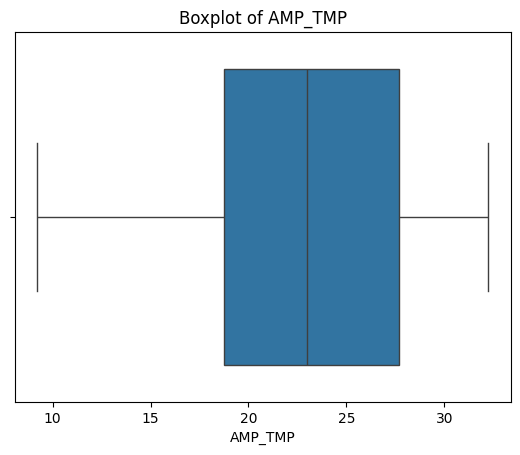

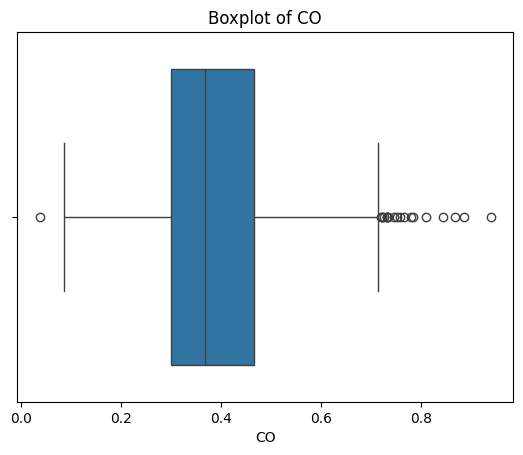

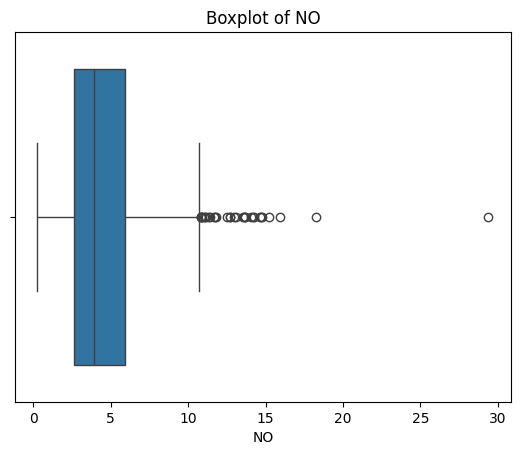

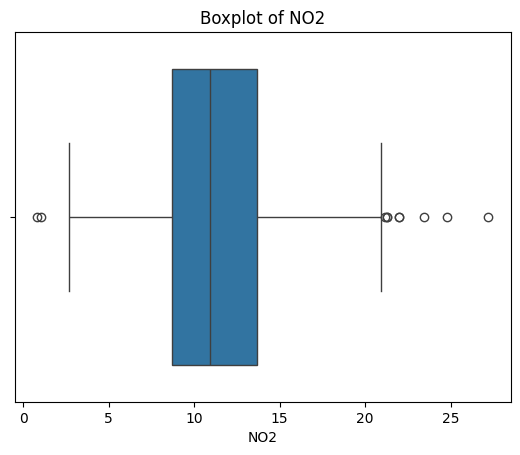

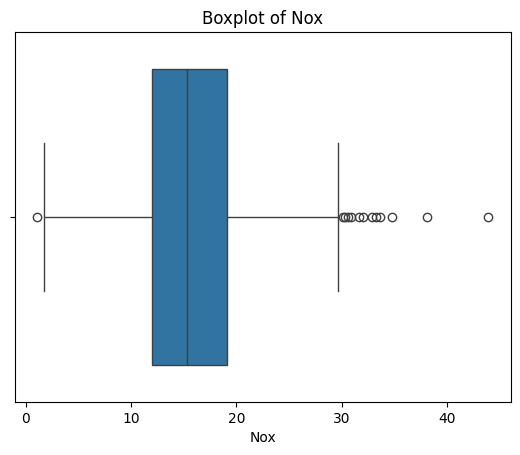

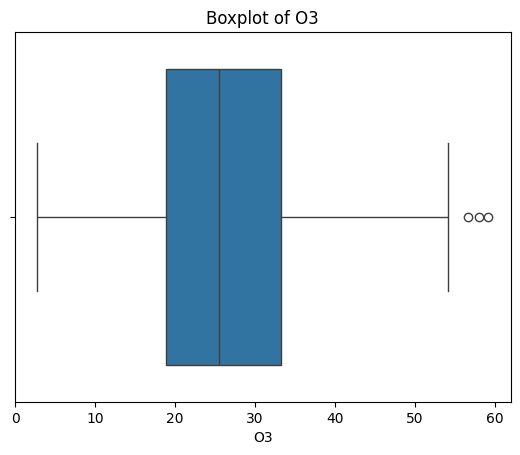

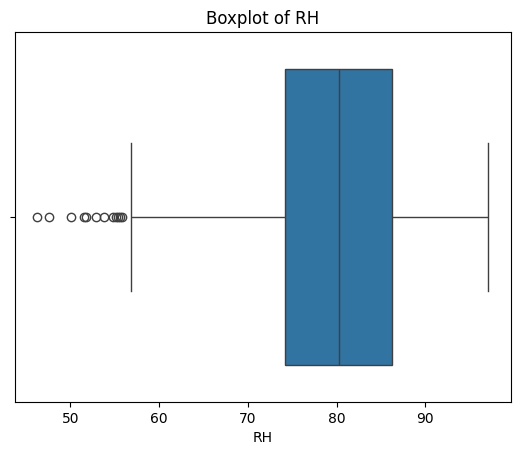

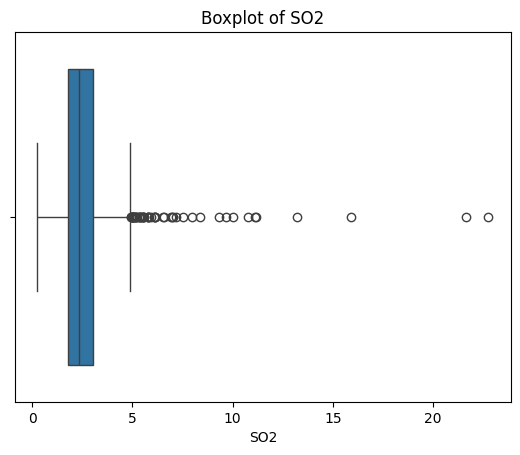

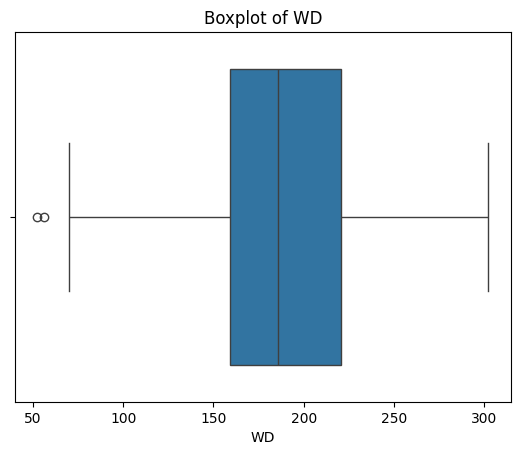

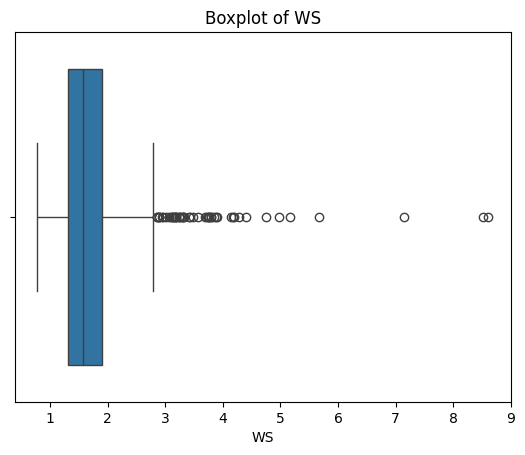

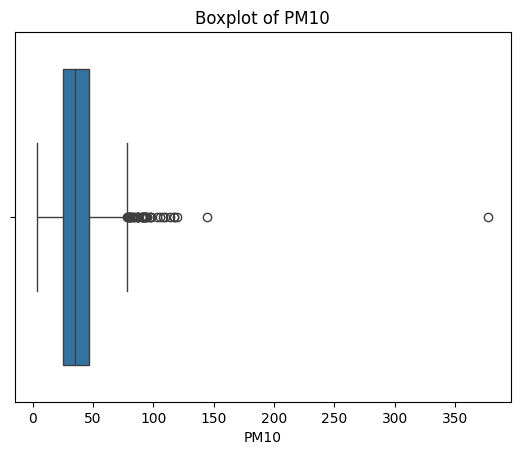


########## SPLITTING ##########

Dimensions of X: 2 2 2
Dimensions of y: 1 1 1
Sizes X rows: 657 219 219
Sizes X columns: 10 10 10
Sizes y: 657 219 219

########## DISTRIBUTION ##########



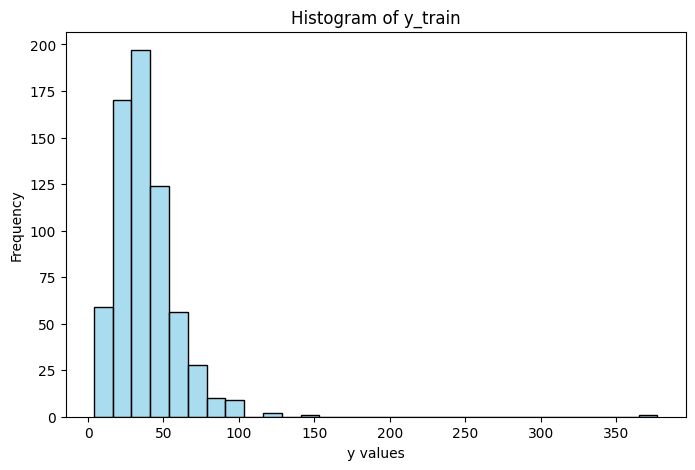

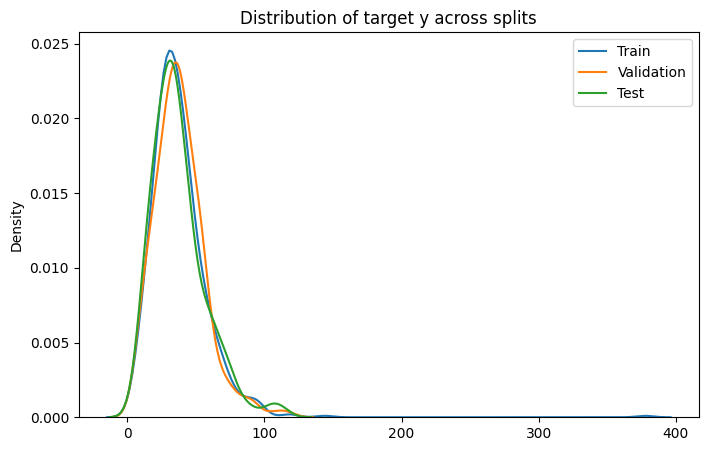

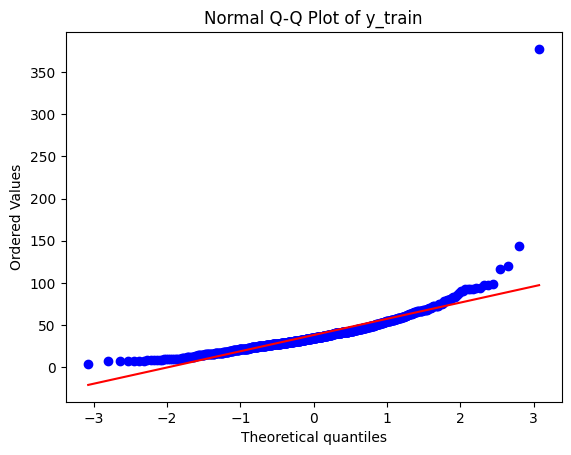

Skewness of y_train: 5.72
All positive


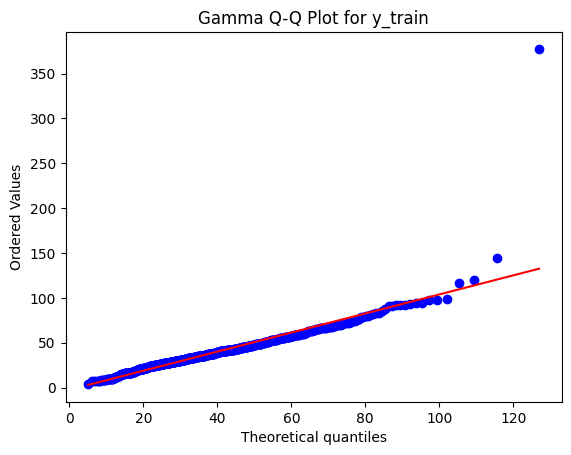


Terms:  s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)

########## LINEAR GAM SUMMARY ##########

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     37.5373
Link Function:                     IdentityLink Log Likelihood:                                 -4340.9067
Number of Samples:                          657 AIC:                                             8758.8881
                                                AICc:                                            8763.8233
                                                GCV:                                              328.4986
                                                Scale:                                            294.8972
                        

/tmp/ipython-input-3998621681.py:239: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


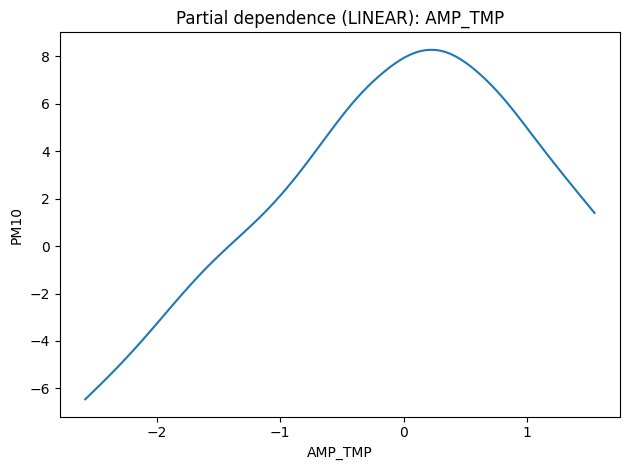

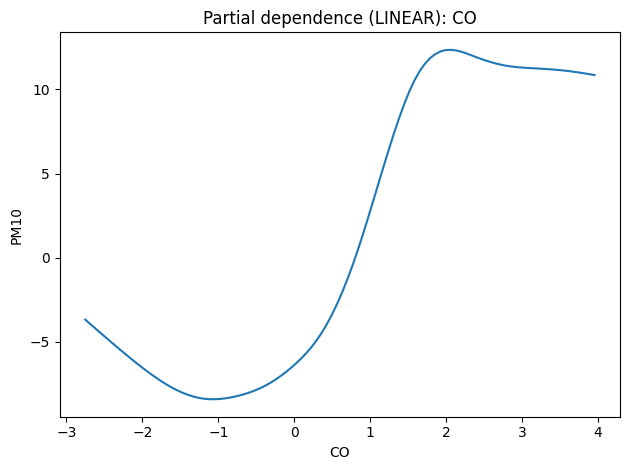

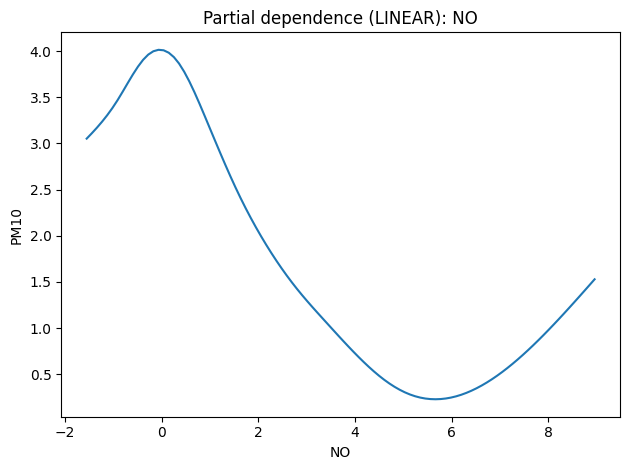

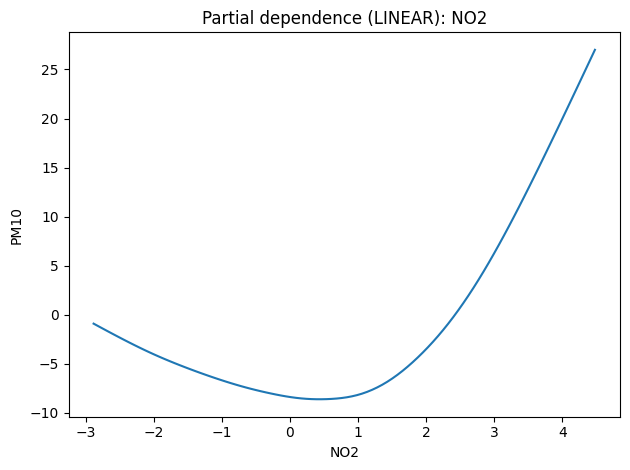

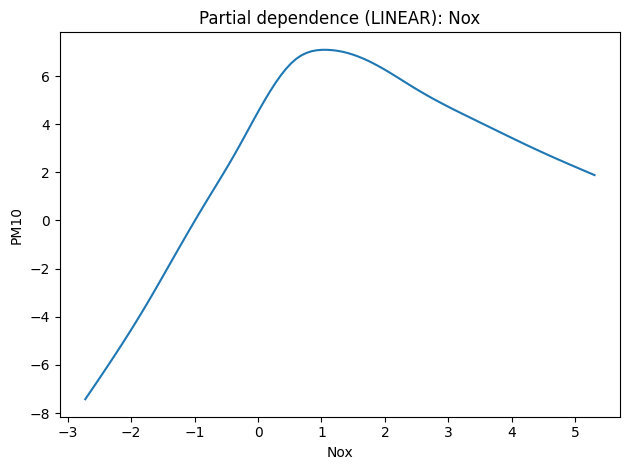

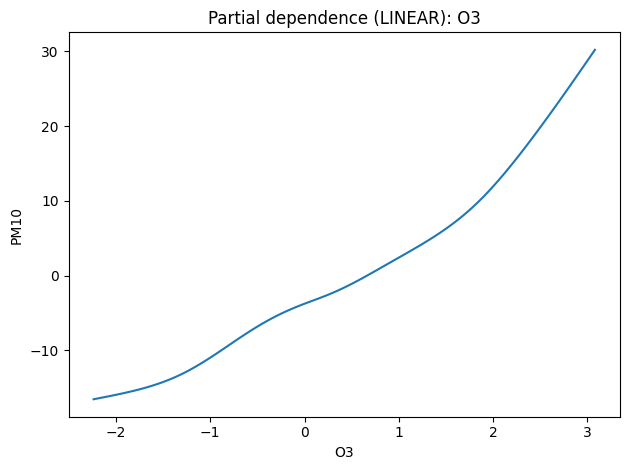

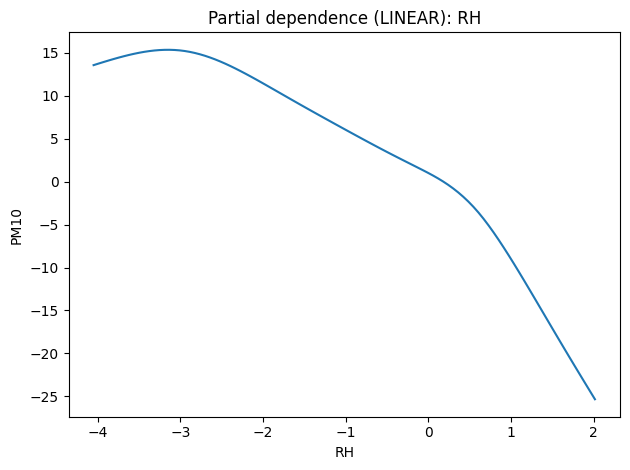

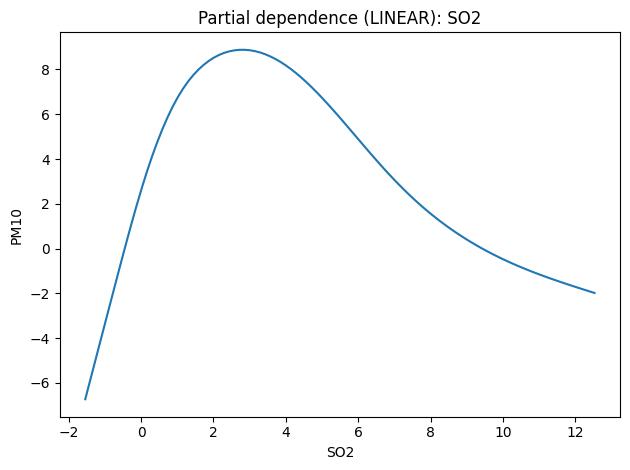

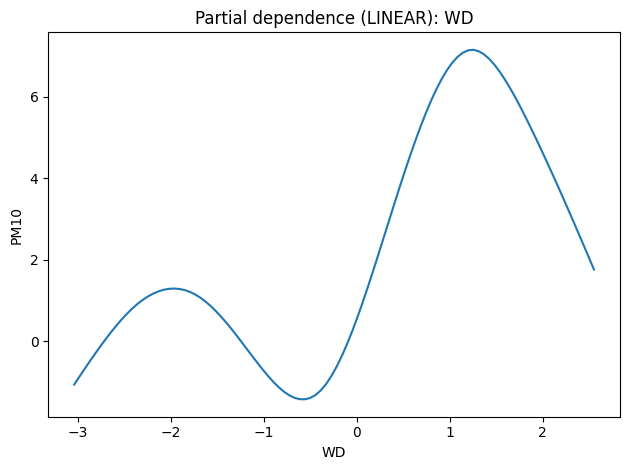

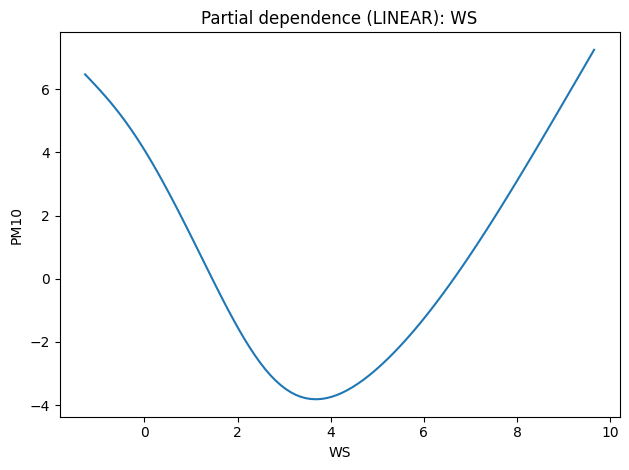


########## GAMMA GAM SUMMARY ##########

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                     37.2907
Link Function:                          LogLink Log Likelihood:                                  -2524.269
Number of Samples:                          657 AIC:                                             5125.1196
                                                AICc:                                            5129.9907
                                                GCV:                                                0.1251
                                                Scale:                                              0.1476
                                                Pseudo R-Squared:                                   0.

/tmp/ipython-input-3998621681.py:366: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gamma_gam.summary())


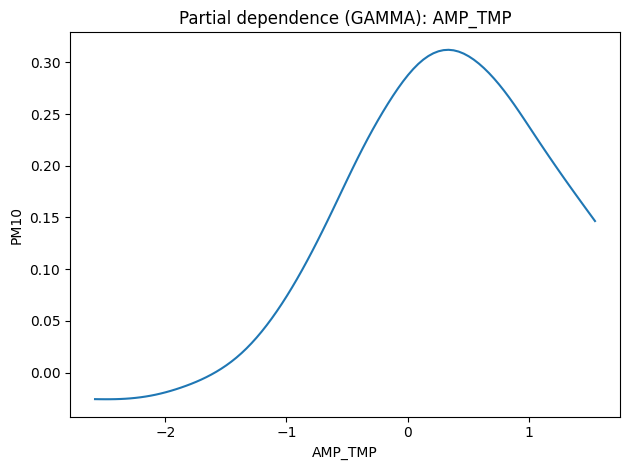

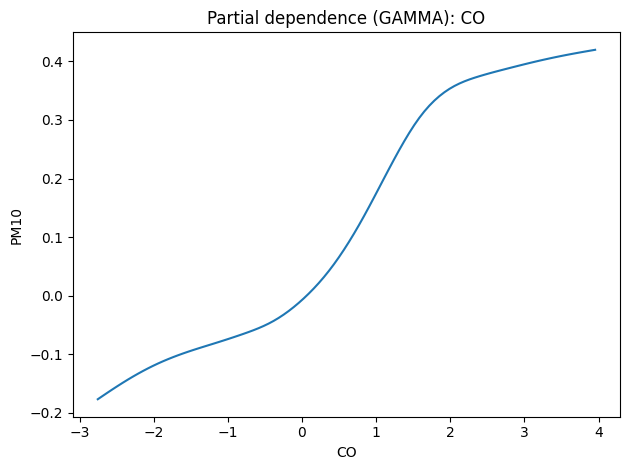

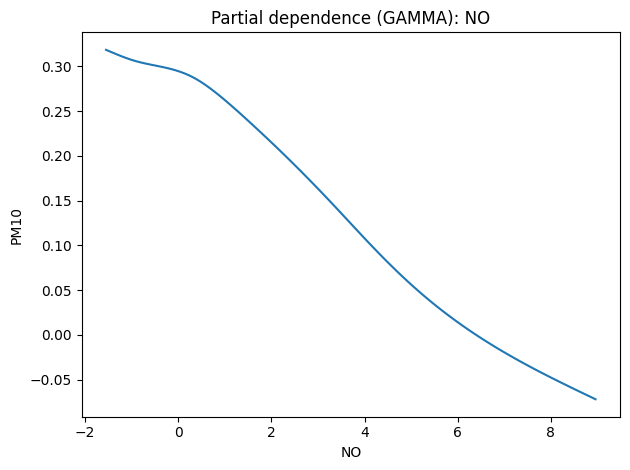

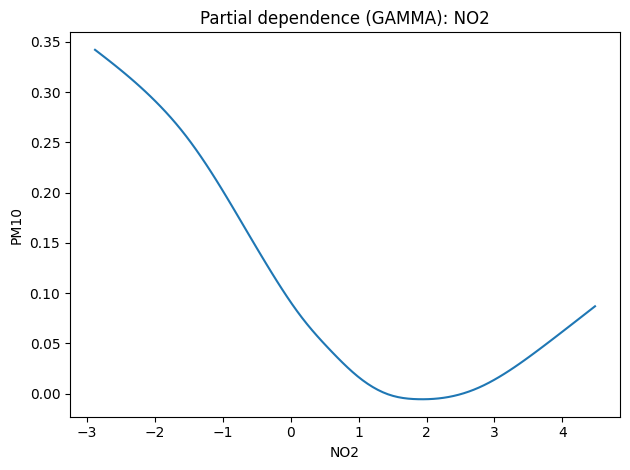

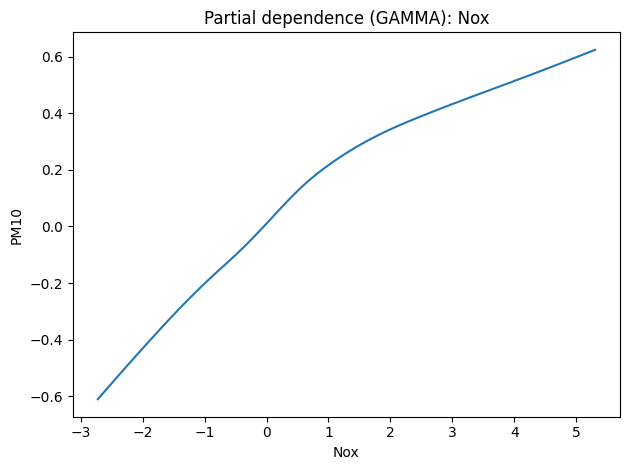

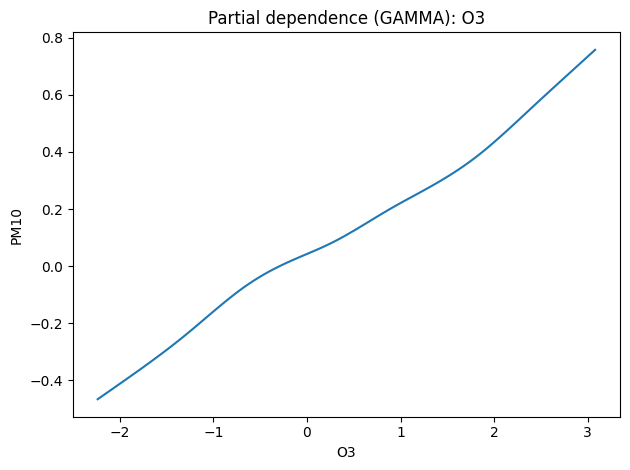

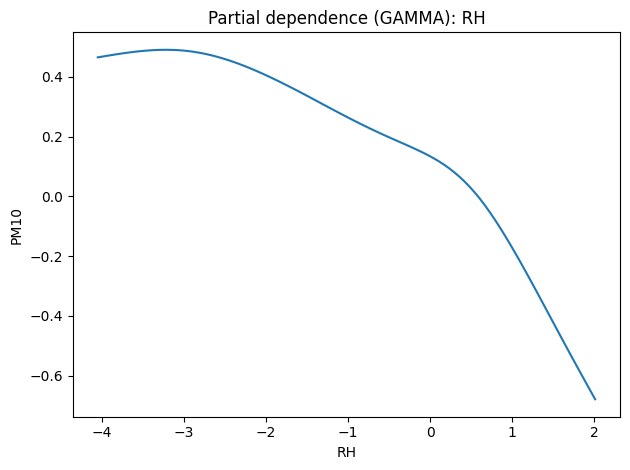

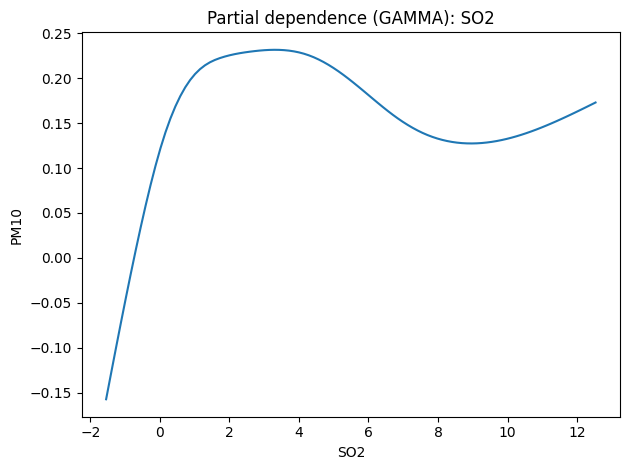

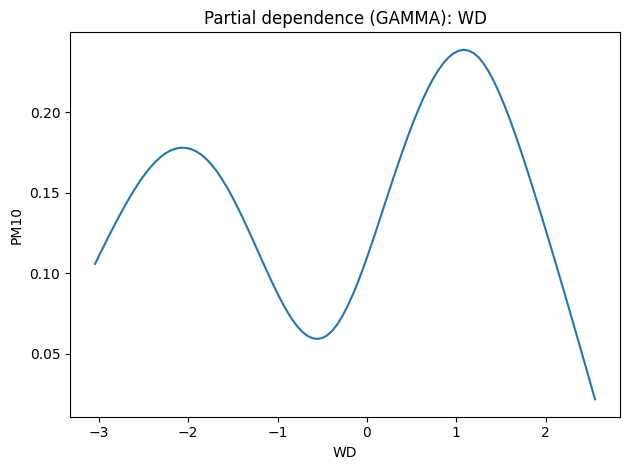

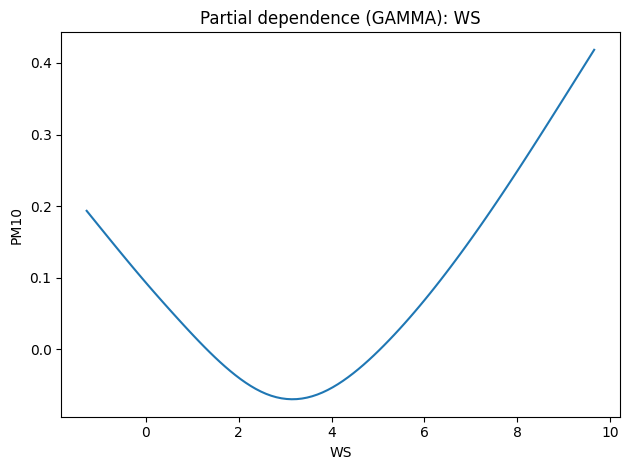


########## LINEAR REGRESSION SUMMARY ##########

Coefficients:  [ 2.98463602  6.42261104 -1.03728448  2.8323635   2.70576579  6.64880196
 -7.00562095  1.43996636  0.61249583 -0.57441434]
Intercept:  38.07868388508364
Validation MAE: 9.863943254894515
Validation RMSE: 13.414917594066392
Validation R²: 0.4509861747626672
0.4509861747626672

Test MAE: 9.364195884679772
Test RMSE: 13.08551276609917
Test R²: 0.546289551047396
0.546289551047396

########## RANDOM FOREST SUMMARY ##########

Validation MAE: 9.741866589464983
Validation RMSE: 14.094400343057895
Validation R²: 0.3939611450312881
0.3939611450312881

Test MAE: 10.873283599074258
Test RMSE: 16.550293405305123
Test R²: 0.27421383560963153
0.27421383560963153

########## MODEL COMPARISON ##########



,Model,Validation R²,Test R²,Test RMSE,Test MAE
0,LinearGAM,0.536584,0.538634,13.195446,9.328122
1,GammaGAM,0.496926,0.560418,12.880164,9.080698
2,LinearRegression,0.450986,0.546290,13.085513,9.364196
3,RandomForest,0.393961,0.274214,16.550293,10.873284


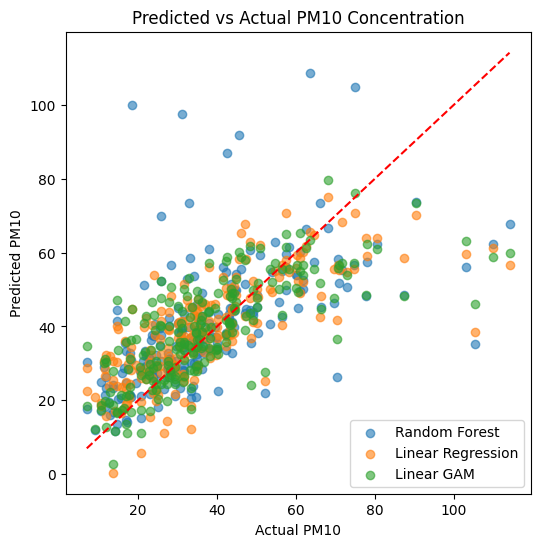

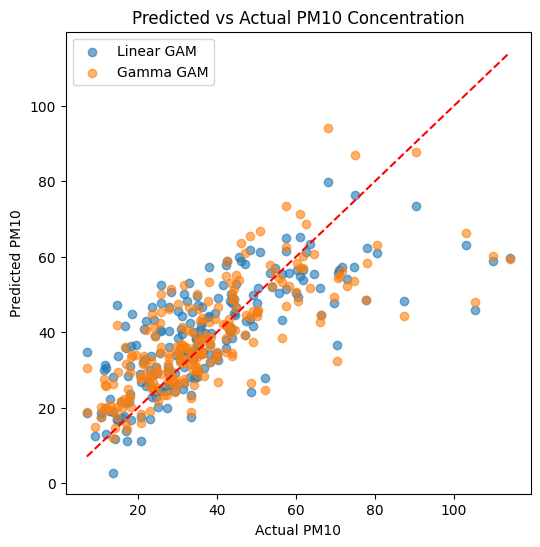

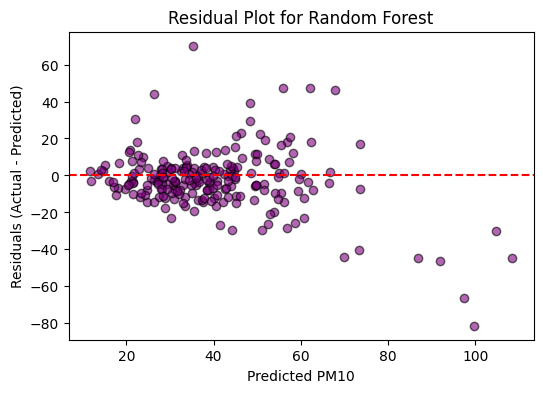

Mean of residuals: -2.3758701929913166
Standard deviation of residuals: 16.378872141504175


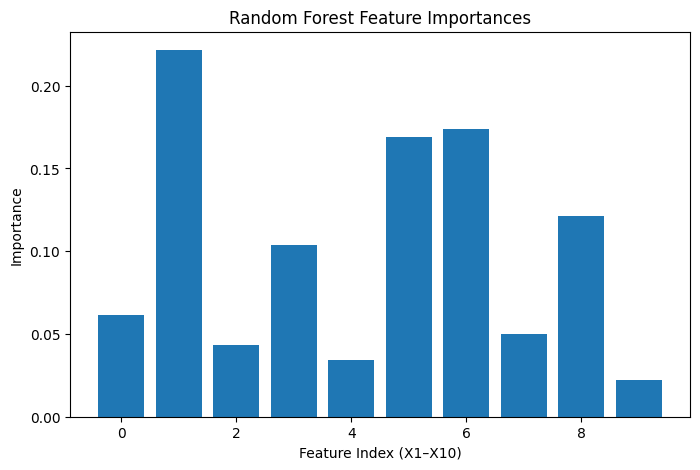

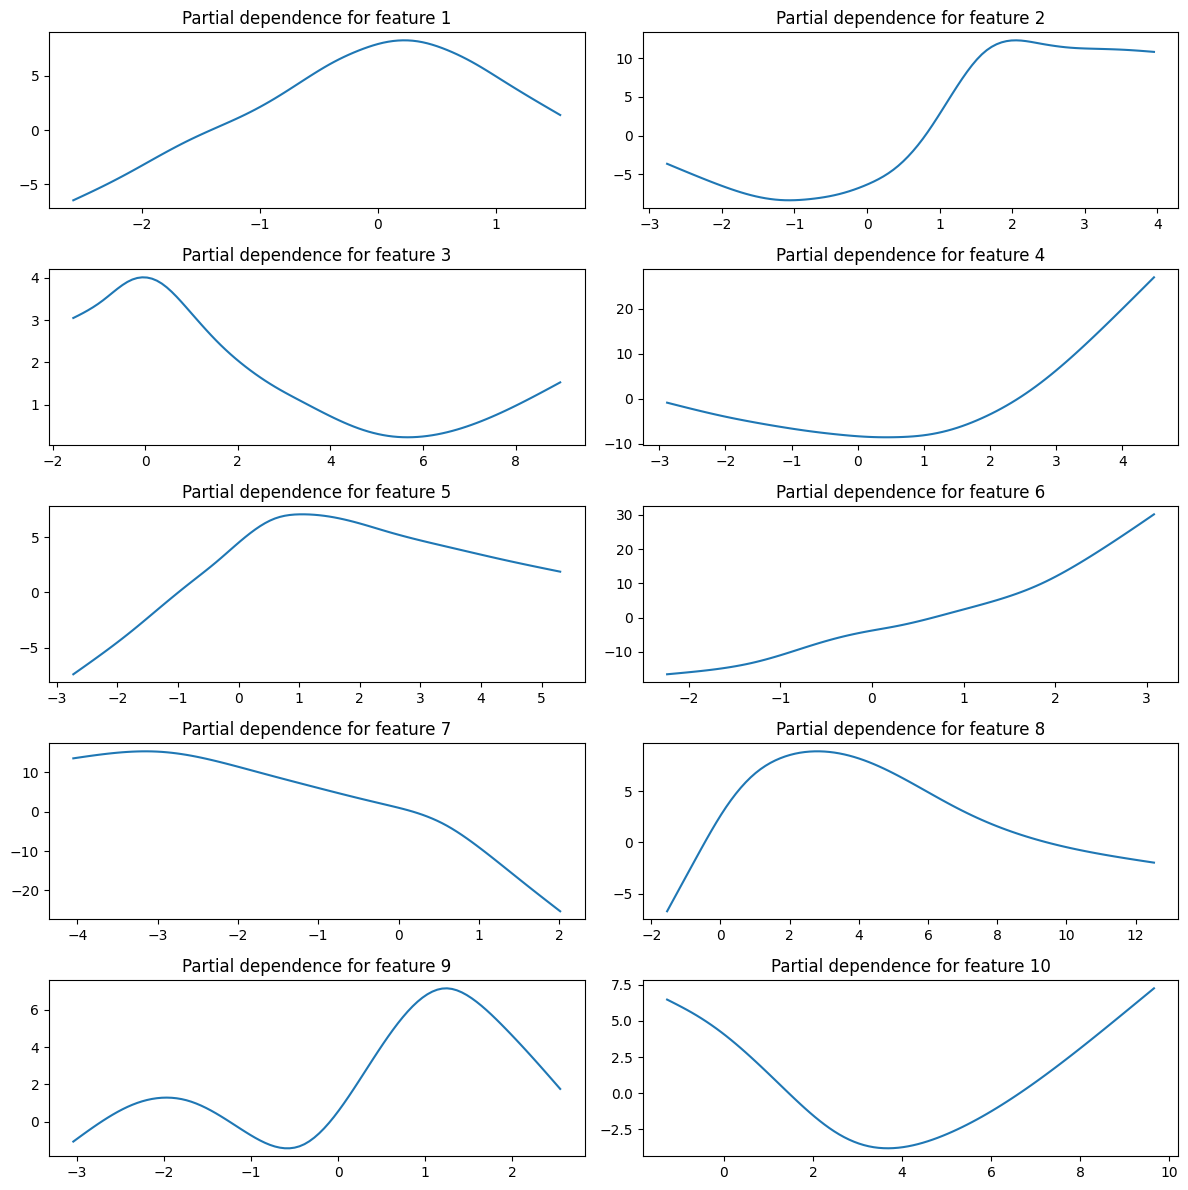

Average 5-Fold CV R² for Random Forest: 0.4555633381192252


In [ ]:
####################################################
# LOADING DATA FROM "PM10 air pollution.xlsx"
####################################################
# !pip install openpyxl
from IPython.display import display

# loads  data - comment/ uncomment next two lines to load the file
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_excel("PM10 air pollution.xlsx")
#df = pd.read_csv("/content/PM10 air pollution.csv")

# displays sample data and other information
print("\n########## FIRST 5 ROWS ##########\n")
display(df.head())

print("\n########## DATA TYPES AND MISSING VALUES ##########\n")
display(df.info())

print("\n########## SIZE OF THE DATASET ##########\n")
display(df.shape)

print("\n########## BASIC STATISTICS ##########\n")
display(df.describe())

####################################################
# OUTLIERS
####################################################

import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

####################################################
# SPLITTING DATA 60% - TRAIN, 20% - VALIDATE, 20% - TEST
####################################################

from sklearn.model_selection import train_test_split

X = df.iloc[:,0:10].to_numpy() # X: all rows, 10 columns
y = df.iloc[:,10].to_numpy() # y: all rows, last column

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=18) # splits data 60% for train, 40% will be used for validation and test half and half
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=18) # splits temp into validation and test half and half


print("\n########## SPLITTING ##########\n")
print("Dimensions of X:", X_train.ndim, X_val.ndim, X_test.ndim) # prints dimensions of X
print("Dimensions of y:", y_train.ndim, y_val.ndim, y_test.ndim) # prints dimensions of y

print("Sizes X rows:", X_train.shape[0], X_val.shape[0], X_test.shape[0]) # number of rows
print("Sizes X columns:", X_train.shape[1], X_val.shape[1], X_test.shape[1]) # number of columns

print("Sizes y:", y_train.shape[0], y_val.shape[0], y_test.shape[0]) # number of rows (this is an array, does not have number of columns like X)

####################################################
# PREPROCESSING
####################################################

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on X_train and transform all sets
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

####################################################
# CHECKING DISTRIBUTION FOR GAM
####################################################

print("\n########## DISTRIBUTION ##########\n")
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of y_train
plt.figure(figsize=(8,5))
sns.histplot(y_train, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title("Histogram of y_train")
plt.xlabel("y values")
plt.ylabel("Frequency")
plt.show()

# KDE function
plt.figure(figsize=(8,5))
sns.kdeplot(y_train, label='Train')
sns.kdeplot(y_val, label='Validation')
sns.kdeplot(y_test, label='Test')
plt.legend()
plt.title("Distribution of target y across splits")
plt.show()

# Q-Q plot - normal distribution https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
import scipy.stats as stats

stats.probplot(y_train, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of y_train")
plt.show()

# Skewness https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
from scipy.stats import skew

skewness = skew(y_train)
print(f"Skewness of y_train: {skewness:.2f}")

# Checking if all y values are positive
if (y_train > 0).all():
  print("All positive")
else:
  print("Some negative")

# Q-Q plot - gamma distribution
params = stats.gamma.fit(y_train)
stats.probplot(y_train, dist=stats.gamma, sparams=params, plot=plt)
plt.title("Gamma Q-Q Plot for y_train")
plt.show()
print("")

####################################################
# SETTING UP THE GAM MODEL, TUNING, FITTING, CHECKING RESULTS
####################################################

!pip install pygam

#################### LINEAR ####################

from pygam import LinearGAM, s
from pygam.terms import TermList
import numpy as np

# Create a TermList for all predictors
terms = TermList(*[s(i) for i in range(X_train.shape[1])])
print("Terms: ", terms)

# Set up GAM
#lams = [100]*10
lams = [[np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)]]
gam = LinearGAM(terms,lam=lams)
gam.fit(X_train, y_train)

'''
# Tuning https://pygam.readthedocs.io/en/latest/api/gam.html#pygam.pygam.GAM.gridsearch

lam = [80, 90]
lams = [lam] * 10
gam.gridsearch(X_train, y_train, lam=lams)
print(gam.lam)

'''

'''
Findings: Wery similar values of MAE, RMSE, R² for simplicity we chose lam = 100 for every s(i)

========== # 1. lam = np.logspace(-2, 2, 2) ==========
best I could do (-2,2,2), 1024 possibilities, other setup crashed, 2 options max, lam from this setup:
[[np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)]]

Validation MAE: 9.32788483701293
Validation RMSE: 12.337603249138263
Validation R²: 0.5356249660433803 <===

Test MAE: 9.201924494177078
Test RMSE: 13.002298117612094
Test R²: 0.5520417607555324

========== #2. lam = [35, 70] ==========
[[np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)]]

Validation MAE: 9.367897732609359
Validation RMSE: 12.32485430135225
Validation R²: 0.5365841854479299 <===

Test MAE: 9.328121702533512
Test RMSE: 13.195446091358482
Test R²: 0.5386341515153062

========== #3. lam = [150, 200] ==========
[[np.int64(200)], [np.int64(150)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(150)], [np.int64(150)], [np.int64(200)]]

Validation MAE: 9.29018662805119
Validation RMSE: 12.350720456922284
Validation R²: 0.534637003990853 <===

Test MAE: 9.143914355207844
Test RMSE: 12.925918298047176
Test R²: 0.5572892138023167

========== #4. lam = [80, 90] ==========
[[np.int64(90)], [np.int64(80)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)]]

Validation MAE: 9.334807841622661
Validation RMSE: 12.329637256916634
Validation R²: 0.536224436394982 <===

Test MAE: 9.233539707938771
Test RMSE: 13.04518445874728
Test R²: 0.5490818266541244

'''

# gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)
# LinearGAM(terms) same as => GAM(terms, distribution=NormalDist(), link=IdentityLink())

# https://pygam.readthedocs.io/en/latest/api/api.html#generalized-additive-model-classes

# gam = GammaGAM(s(0) + s(1) + f(2)) - positive skewed continuous, same as => GAM(terms, distribution=GammaDist(), link=LogLink())
# gam = InvGaussGAM(s(0) + s(1) + f(2)) - positive, heavily skewed
# gam = LogisticGAM(s(0) + s(1) + f(2)) - binary classification same as => GAM(terms, distribution=BinomialDist(), link=LogitLink())
# gam = PoissonGAM(s(0) + s(1) + f(2)) - counts same as => GAM(terms, distribution=PoissonDist(), link=LogLink())
# gam = ExpectileGAM(s(0) + s(1) + f(2))

# https://pygam.readthedocs.io/en/latest/api/api.html#spline-term

# gam = LinearGAM(s(0) + s(1) + s(2, n_splines=15, lam=0.7, basis=ps, spline_order=3) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)
# n_splines - number of splines
# lam - overall wiggliness of entire smooth term s(i), larger lam = smoother curve - may underfit, smaller lam = more wiggly - may overfit but allows more complex relationship
# basis - type of basis function to use in the term, pygam allows ps- p-spline basis, cp - cyclic p-spline basis
# spline_order=3 cubic

# https://app.readthedocs.org/projects/pygam/downloads/pdf/stable/

# l() linear terms: for terms like 𝑋𝑖, roughly straight line
# s() spline terms: smooth, non-linear effect
# f() factor terms: categorical variables
# te() tensor products: Captures interaction effects between two or more variables
# intercept: baseline value of the response when all predictors are zero


# Display model summary
print("\n########## LINEAR GAM SUMMARY ##########\n")
print(gam.summary())

# Predict on validation and test sets
y_val_pred_l = gam.predict(X_val)
y_test_pred_l = gam.predict(X_test)

# Metrics for LinearGAM

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_val_l = r2_score(y_val, y_val_pred_l)
r2_test_l = r2_score(y_test, y_test_pred_l)

mae_val_l = mean_absolute_error(y_val, y_val_pred_l)
mse_val_l = mean_squared_error(y_val, y_val_pred_l)
rmse_val_l = np.sqrt(mse_val_l)

mae_test_l = mean_absolute_error(y_test, y_test_pred_l)
mse_test_l = mean_squared_error(y_test, y_test_pred_l)
rmse_test_l = np.sqrt(mse_test_l)


print("Validation MAE:", mae_val_l)
print("Validation RMSE:", rmse_val_l)
print("Validation R²:", r2_val_l)
print("")
print("Test MAE:", mae_test_l)
print("Test RMSE:", rmse_test_l)
print("Test R²:", r2_test_l)

# Partial dependencies

import matplotlib.pyplot as plt
from pygam.terms import TermList


# Partial dependence plots for each predictor (LINEAR)

predictor_names = df.drop(columns=['PM10']).columns

for i, name in enumerate(predictor_names):
    XX = gam.generate_X_grid(term=i)
    plt.figure()
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    # plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')
    plt.title(f"Partial dependence (LINEAR): {name}")
    plt.ylabel('PM10')
    plt.xlabel(name)
    plt.tight_layout()
    plt.show()

#################### GAMMA ###################

from pygam import GAM, s
from pygam.distributions import GammaDist
from pygam.links import LogLink

# Create TermList for all predictors
terms = TermList(*[s(i) for i in range(X_train.shape[1])])

# Fit GAM with Gamma distribution and Log link

lams = [[np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)]]
gamma_gam = GAM(terms, distribution=GammaDist(), link=LogLink(), lam=lams)
gamma_gam.fit(X_train, y_train)

'''
# Tuning https://pygam.readthedocs.io/en/latest/api/gam.html#pygam.pygam.GAM.gridsearch

# lam = np.logspace(-2, 2, 2)
lam = [35, 70]
lams = [lam] * X_train.shape[1]
gamma_gam.gridsearch(X_train, y_train, lam=lams)
print(gamma_gam.lam)
'''


'''
Findings: Wery similar values of MAE, RMSE, R², overall lower than for linear gam

========== # 1. lam = np.logspace(-2, 2, 2) ==========
[[np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)], [np.float64(100.0)]]

Validation MAE: 9.61470659660132
Validation RMSE: 12.934591064485462
Validation R²: 0.4895976467236781 <===

Test MAE: 9.032022857406988
Test RMSE: 12.840878748363627
Test R²: 0.5630952358238248

========== #2. lam = [35, 70] ==========
[[np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(70)], [np.int64(35)], [np.int64(70)], [np.int64(70)]]

Validation MAE: 9.578659857788022
Validation RMSE: 12.841379189145238
Validation R²: 0.49692747044373253 <===

Test MAE: 9.080696917870128
Test RMSE: 12.880167750389928
Test R²: 0.5604175666292098

========== #3. lam = [150, 200] ==========
[[np.int64(200)], [np.int64(150)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(200)], [np.int64(150)], [np.int64(150)], [np.int64(150)], [np.int64(200)]]

Validation MAE: 9.59492027571841
Validation RMSE: 12.981091818099298
Validation R²: 0.48592118616706015 <===

Test MAE: 8.968009270031345
Test RMSE: 12.780459553144002
Test R²: 0.5671970316355832

========== #4. lam = [80, 90] ==========
[[np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(90)], [np.int64(80)], [np.int64(80)], [np.int64(90)]]

Validation MAE: 9.604902299089039
Validation RMSE: 12.903763670517645
Validation R²: 0.4920276615958782 <===

Test MAE: 9.048218411612211
Test RMSE: 12.847853770595115
Test R²: 0.5626204633156002
'''

# Display model summary
print("\n########## GAMMA GAM SUMMARY ##########\n")
print(gamma_gam.summary())

# Predict on validation and test sets
y_val_pred_g = gamma_gam.predict(X_val)
y_test_pred_g = gamma_gam.predict(X_test)

# Metrics for GammaGAM

r2_val_g = r2_score(y_val, y_val_pred_g)
r2_test_g = r2_score(y_test, y_test_pred_g)

mae_val_g = mean_absolute_error(y_val, y_val_pred_g)
mse_val_g = mean_squared_error(y_val, y_val_pred_g)
rmse_val_g = np.sqrt(mse_val_g)

mae_test_g = mean_absolute_error(y_test, y_test_pred_g)
mse_test_g = mean_squared_error(y_test, y_test_pred_g)
rmse_test_g = np.sqrt(mse_test_g)


print("Validation MAE:", mae_val_g)
print("Validation RMSE:", rmse_val_g)
print("Validation R²:", r2_val_g)
print("")
print("Test MAE:", mae_test_g)
print("Test RMSE:", rmse_test_g)
print("Test R²:", r2_test_g)

# Partial dependence plots for each predictor (GAMMA)

predictor_names = df.drop(columns=['PM10']).columns

for i, name in enumerate(predictor_names):
    XX = gamma_gam.generate_X_grid(term=i)
    plt.figure()
    plt.plot(XX[:, i], gamma_gam.partial_dependence(term=i, X=XX))
    # plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')
    plt.title(f"Partial dependence (GAMMA): {name}")
    plt.ylabel('PM10')
    plt.xlabel(name)
    plt.tight_layout()
    plt.show()

####################################################
# LINEAR REGRESSION
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
####################################################

from sklearn.linear_model import LinearRegression

print("\n########## LINEAR REGRESSION SUMMARY ##########\n")


linear_reg = LinearRegression().fit(X_train, y_train)
print("Coefficients: ", linear_reg.coef_)
print("Intercept: ",linear_reg.intercept_)

# Predict on validation and test sets
y_val_pred_lr = linear_reg.predict(X_val)
y_test_pred_lr = linear_reg.predict(X_test)

# Metrics for Linear Regression

r2_val_lr = r2_score(y_val, y_val_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

mae_val_lr = mean_absolute_error(y_val, y_val_pred_lr)
mse_val_lr = mean_squared_error(y_val, y_val_pred_lr)
rmse_val_lr = np.sqrt(mse_val_lr)

mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

print("Validation MAE:", mae_val_lr)
print("Validation RMSE:", rmse_val_lr)
print("Validation R²:", r2_val_lr)
print(linear_reg.score(X_val,y_val)) # same as R^2
print("")
print("Test MAE:", mae_test_lr)
print("Test RMSE:", rmse_test_lr)
print("Test R²:", r2_test_lr)
print(linear_reg.score(X_test,y_test)) # same as R^2

####################################################
# RANDOM FOREST
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
####################################################

from sklearn.ensemble import RandomForestRegressor

print("\n########## RANDOM FOREST SUMMARY ##########\n")

#random_forest = RandomForestRegressor().fit(X_train, y_train)

# RANDOM FOREST (TUNED)
from sklearn.ensemble import RandomForestRegressor

# Tune hyperparameters for better performance
random_forest = RandomForestRegressor(
    n_estimators=300,       # number of trees
    max_depth=10,           # controls tree depth to reduce overfitting
    min_samples_split=5,    # minimum samples required to split a node
    min_samples_leaf=3,     # minimum samples at a leaf node
    random_state=18,        # for reproducibility
    n_jobs=-1               # uses all CPU cores
).fit(X_train, y_train)


# Predict on validation and test sets
y_val_pred_rf = random_forest.predict(X_val)
y_test_pred_rf = random_forest.predict(X_test)

# Metrics for Random Forest

r2_val_rf = r2_score(y_val, y_val_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_val_rf = np.sqrt(mse_val_rf)

mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

print("Validation MAE:", mae_val_rf)
print("Validation RMSE:", rmse_val_rf)
print("Validation R²:", r2_val_rf)
print(random_forest.score(X_val,y_val)) # same as R^2
print("")
print("Test MAE:", mae_test_rf)
print("Test RMSE:", rmse_test_rf)
print("Test R²:", r2_test_rf)
print(random_forest.score(X_test,y_test)) # same as R^2


####################################################
# MODEL COMPARISON SUMMARY TABLE
####################################################
import pandas as pd

results = pd.DataFrame({
    'Model': ['LinearGAM', 'GammaGAM', 'LinearRegression', 'RandomForest'],
    'Validation R²': [r2_val_l, r2_val_g, r2_val_lr, r2_val_rf],
    'Test R²': [r2_test_l, r2_test_g, r2_test_lr, r2_test_rf],
    'Test RMSE': [rmse_test_l, rmse_test_g, rmse_test_lr, rmse_test_rf],
    'Test MAE': [mae_test_l, mae_test_g, mae_test_lr, mae_test_rf]
})

print("\n########## MODEL COMPARISON ##########\n")
display(results)


####################################################
# PREDICTED VS ACTUAL VALUES
####################################################
import matplotlib.pyplot as plt

### LINEAR GAM, RANDOM FOREST AND LINEAR REGRESSION

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_test_pred_l, alpha=0.6, label='Linear GAM')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PM10")
plt.ylabel("Predicted PM10")
plt.title("Predicted vs Actual PM10 Concentration")
plt.legend()
plt.show()


### GAM: LINEAR AND GAMMA

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_l, alpha=0.6, label='Linear GAM')
plt.scatter(y_test, y_test_pred_g, alpha=0.6, label='Gamma GAM')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PM10")
plt.ylabel("Predicted PM10")
plt.title("Predicted vs Actual PM10 Concentration")
plt.legend()
plt.show()


####################################################
# RESIDUAL PLOT (ERROR ANALYSIS)
####################################################
residuals = y_test - y_test_pred_rf

plt.figure(figsize=(6,4))
plt.scatter(y_test_pred_rf, residuals, alpha=0.6, color='purple', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for Random Forest")
plt.xlabel("Predicted PM10")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

# Optional: summary statistics for residuals
import numpy as np
print("Mean of residuals:", np.mean(residuals))
print("Standard deviation of residuals:", np.std(residuals))



####################################################
# FEATURE IMPORTANCE (RANDOM FOREST)
####################################################
import numpy as np

importances = random_forest.feature_importances_
plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances)
plt.title("Random Forest Feature Importances")
plt.xlabel("Feature Index (X1–X10)")
plt.ylabel("Importance")
plt.show()


####################################################
# GAM PARTIAL DEPENDENCE PLOTS (INTERPRETATION)
####################################################
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
for i, ax in enumerate(axs.flatten()):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.set_title(f"Partial dependence for feature {i+1}")
plt.tight_layout()
plt.show()

####################################################
# RANDOM FOREST CROSS-VALIDATION
####################################################
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X, y, cv=5, scoring='r2')
print("Average 5-Fold CV R² for Random Forest:", scores.mean())





